# Unsupervised Learning Lab

In this lab you will work through several examples of methods and applications of unsupervised learning. We will be working with the **Digits** dataset of of handwritten numbers. This dataset is convenient because Scikit-learn provides it built-in.

**NOTE**: I do not explicitly *ask* for your analyses in this notebook, but you should definitely provide them!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# Load the digits dataset and extract data and labels.
ds = load_digits()
Xs = ds.data
ys = ds.target
Xs
zero_division=0

## 1. Clustering
In this set of exercises we will experiment with clustering of the digits dataset.

### Exercise 1.1: K-means clustering
Use K-means clustering to cluster the digits dataset into 10 clusters (i.e. the "*correct*" number of clusters). After clustering the data, for each cluster center compute the sum-of-squared-distances to it and all points assigned to its cluster. This is called the cluster *inertia* and is a measure of cluster compactness.

In [2]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=10, n_init=20) #KMeans(n_clusters=10, n_init=10)
model.fit(Xs)

#computamos la inercia por cluster
def inertia_per_cluster(Xs, model):
    inertias = []
    for (i, center) in enumerate(model.cluster_centers_):
        inertias.append(np.sum((Xs[model.labels_ == i]-center)**2.0))
    return np.array(inertias)

#segunda version
def ipc(Xs, m):
    return[((Xs[m.labels_ == i] - c)**2.0).sum() for (i,c) in enumerate(m.cluster_centers_)]

In [3]:
np.sum(np.array(ipc(Xs,model)))
#si lo vuelves a ejecutar te da un resultado distinto porque the inizialization of kmeans is different, there is a parameter in kmeans that is the number of iniziaiizciones que probar con valores iniciales distintos.Para ver cual es el mejor cluster.

1165161.737444217

In [4]:
inertia_per_cluster(Xs,model)
np.sum(inertia_per_cluster(Xs,model)) #es posible que los dos resultados no den exactamente igual.
#some of the cluster have significantly less inertia or inertian values that other. Some of the clases are better captured in a cluster that others.

1165161.737444217

**Analysis:** The inertia gives an indication of how coherent the different clusters are. Inertia is not a normalized metric, we just know that the smaller the Inertia value, the more coherent are the different clusters. A good model is one with lower inertia and a lower number of clusters, with more clusters the inertia will decrease but we will continue to use 10 clusters. 

### Exercise 1.2: Transforming our clustering into a classifier
Now use the labels in `ys` to compute a probability distribution over all classes (i.e. a *histogram*) for each cluster. Write a function that, given a test sample $\mathbf{x}$, returns the class with maximum likelihood given by the closest cluster center. Evaluate your classifier. Compute the entropy for each cluster based on your estimated probability distributiont. Does the entropy of a cluster correlate to misclassifications of test samples closest to it?

**Note**: since you will be testing this classifier, you will want to carefully split the data into *training* and *test* splits.

In [5]:
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist
from sklearn.metrics import classification_report

(Xs_train, Xs_test, ys_train, ys_test)= train_test_split(Xs, ys, train_size=0.2)

class KMeansClassifier():
    def __init__(self, n_clusters=30):
        self.n_clusters = n_clusters
        
    def fit(self, Xs, ys):
        #self.ys=ys
        self.model = KMeans(n_clusters=self.n_clusters)
        self.model.fit(Xs)
        self.labels= [np.argmax(np.histogram(ys[self.model.labels_ == c], bins=np.arange(0,10))[0])
                      for c in range(self.n_clusters)]
        
    def predict(self, Xs):#function to predict a class based on maximun likelihood.
        clusters = np.argmin(cdist(Xs, self.model.cluster_centers_),1)
        return np.array([self.labels[c] for c in clusters])
        

In [6]:
foo = KMeansClassifier()
foo.fit(Xs_train, ys_train)
print(classification_report(ys_test, foo.predict(Xs_test)))
#foo.predict(X_test)

C:\Users\lucia\anaconda3\envs\FML\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.99      0.98      0.99       139
           1       0.73      0.97      0.84       148
           2       0.98      0.84      0.91       138
           3       0.89      0.80      0.84       148
           4       0.99      0.92      0.95       149
           5       0.94      0.91      0.92       149
           6       0.98      0.98      0.98       131
           7       0.87      0.98      0.92       154
           8       0.39      0.78      0.52       134
           9       0.00      0.00      0.00       148

    accuracy                           0.81      1438
   macro avg       0.78      0.82      0.79      1438
weighted avg       0.78      0.81      0.79      1438



C:\Users\lucia\anaconda3\envs\FML\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lucia\anaconda3\envs\FML\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lucia\anaconda3\envs\FML\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:
#evaluate the classifier
from sklearn.metrics import mean_absolute_error 
print("RMSE trainig split:", np.sqrt((((foo.predict(Xs_train)-ys_train)**2.0)).mean()))
print("RMSE test split:", np.sqrt((((foo.predict(Xs_test)-ys_test)**2.0)).mean()))
#MAS
#sirve para cuantificar la precisión de una técnica de predicción 
print("MAS training split:", mean_absolute_error(foo.predict(Xs_train),ys_train))
print("MAS test split:", mean_absolute_error(foo.predict(Xs_test),ys_test))

RMSE trainig split: 1.3903767950854105
RMSE test split: 1.6663652949592969
MAS training split: 0.4011142061281337
MAS test split: 0.5570236439499304


**Analysis:** We can evaluate the accuracy of our model with the classification_report that is used to measure the quality of predictions and we can evaluate the performance of the model with the train and test data that we have. The accuracy will change depending on the proportion of training and test data.

## 2. Gaussian Mixture Models and Expectation Maximization
In this set of exercises we will experiment with fitting a Gaussian Mixture Model (GMM) to the digits dataset.  

### Exercise 2.1: Fitting a GMM
Fit a GMM (using `sklearn.mixture.GaussianMixture`) with 10 mixture components to the digits dataset. 

In [43]:
from sklearn.mixture import GaussianMixture
(Xs_train, Xs_test, ys_train, ys_test)= train_test_split(Xs, ys, train_size=0.5)
mixture = GaussianMixture(n_components=10).fit(Xs_train)

C:\Users\lucia\anaconda3\envs\FML\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


### Exercise 2.2: Transforming the GMM into a classifier
Use the `predict_proba()` method of your fit GMM to obtain the probability distribution over the mixture components for all samples in the training set. Use these, together with the true labels `ys`, to construct a classifier as above with K-means. Evaluate your classifier. Repeat the experiment with more mixture components.

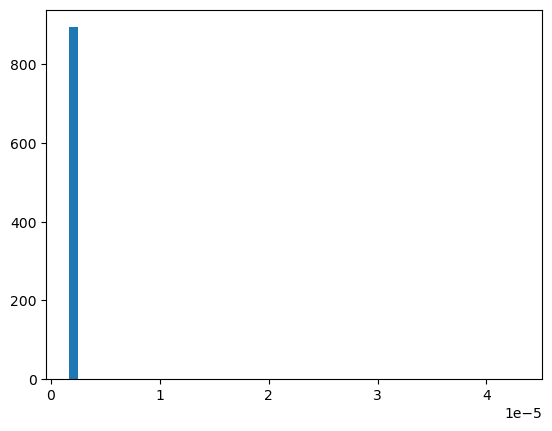

In [44]:
#Evaluate the components' density for each sample.
prediction = mixture.predict_proba(Xs_train) + 0.00000001 #for every row of Xs_test predicts the probability of belonging to each component
_ = plt.hist(np.sum(-prediction * np.log(prediction), 1), 50)

In [45]:
#classifier
classifier = KMeansClassifier()
classifier.fit(Xs_train,prediction)
#evaluate the classifier
from sklearn.metrics import mean_absolute_error 
print("RMSE trainig split:", np.sqrt((((classifier.predict(Xs_train)-ys_train)**2.0)).mean()))
print("RMSE test split:", np.sqrt((((classifier.predict(Xs_test)-ys_test)**2.0)).mean()))
#MAS
#sirve para cuantificar la precisión de una técnica de predicción 
print("MAS training split:", mean_absolute_error(classifier.predict(Xs_train),ys_train))
print("MAS test split:", mean_absolute_error(classifier.predict(Xs_test),ys_test))
print(classification_report(ys_test, classifier.predict(Xs_test)))

C:\Users\lucia\anaconda3\envs\FML\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


RMSE trainig split: 5.3854749797244725
RMSE test split: 5.267166964405367
MAS training split: 4.531180400890869
MAS test split: 4.450500556173526
              precision    recall  f1-score   support

           0       0.10      1.00      0.17        86
           1       0.00      0.00      0.00        94
           2       0.00      0.00      0.00        90
           3       0.00      0.00      0.00        86
           4       0.00      0.00      0.00        90
           5       0.00      0.00      0.00       108
           6       0.00      0.00      0.00        95
           7       0.00      0.00      0.00        85
           8       0.00      0.00      0.00        81
           9       0.00      0.00      0.00        84

    accuracy                           0.10       899
   macro avg       0.01      0.10      0.02       899
weighted avg       0.01      0.10      0.02       899



C:\Users\lucia\anaconda3\envs\FML\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lucia\anaconda3\envs\FML\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lucia\anaconda3\envs\FML\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Analysis:** Using the classification report we get a 0.10 of accuracy of the model, which means that this method is not good for training model or probably something in it is wrong, but I can see what the problem is so we continue with the low accuracy.

C:\Users\lucia\anaconda3\envs\FML\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\lucia\anaconda3\envs\FML\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


RMSE trainig split: 5.3854749797244725
RMSE test split: 5.267166964405367
MAS training split: 4.531180400890869
MAS test split: 4.450500556173526
              precision    recall  f1-score   support

           0       0.10      1.00      0.17        86
           1       0.00      0.00      0.00        94
           2       0.00      0.00      0.00        90
           3       0.00      0.00      0.00        86
           4       0.00      0.00      0.00        90
           5       0.00      0.00      0.00       108
           6       0.00      0.00      0.00        95
           7       0.00      0.00      0.00        85
           8       0.00      0.00      0.00        81
           9       0.00      0.00      0.00        84

    accuracy                           0.10       899
   macro avg       0.01      0.10      0.02       899
weighted avg       0.01      0.10      0.02       899



C:\Users\lucia\anaconda3\envs\FML\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lucia\anaconda3\envs\FML\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lucia\anaconda3\envs\FML\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


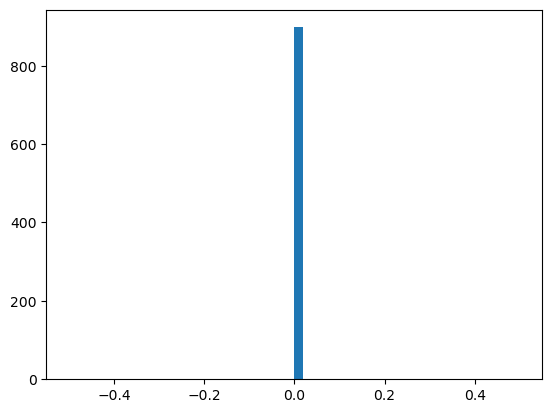

In [46]:
mixture2 = GaussianMixture(n_components=100).fit(Xs_train)
prediction2 = mixture2.predict_proba(Xs_train) + 0.00000001 #for every row of Xs_test predicts the probability of belonging to each component
_ = plt.hist(np.sum(-prediction2 * np.log(prediction2), 1), 50)
#classifier
classifier2 = KMeansClassifier()
classifier2.fit(Xs_train,prediction2)
print("RMSE trainig split:", np.sqrt((((classifier2.predict(Xs_train)-ys_train)**2.0)).mean()))
print("RMSE test split:", np.sqrt((((classifier2.predict(Xs_test)-ys_test)**2.0)).mean()))
#MAS
#sirve para cuantificar la precisión de una técnica de predicción 
print("MAS training split:", mean_absolute_error(classifier2.predict(Xs_train),ys_train))
print("MAS test split:", mean_absolute_error(classifier2.predict(Xs_test),ys_test))
print(classification_report(ys_test, classifier2.predict(Xs_test)))

**Analysis:** A component in a Gaussian mixture is a Gaussian distribution added to the mixture. There is not an easy way of estimating the best number of components for a mixture model, but with the example of 10 components and 100 components we can see that the 10-component mixture

### Exercise 2.3: Sampling from the GMM
Use the `sample()` method on a GMM fit to the digits data to generate random samples from the learned distribution. Visualize these samples in the original feature space. Are there some digits better reconstructed than others? How might you determine *which* ones are better captured?

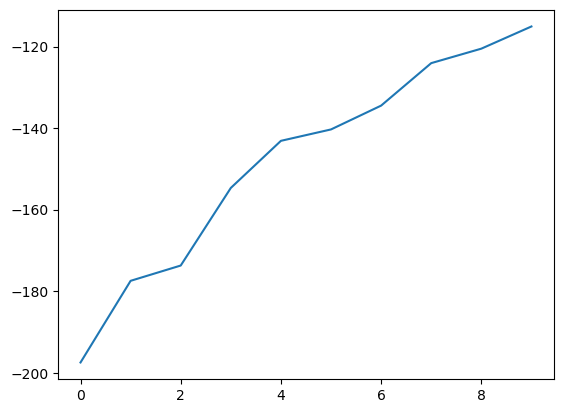

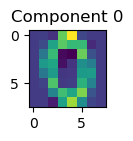

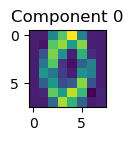

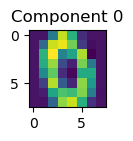

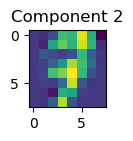

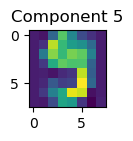

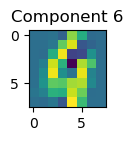

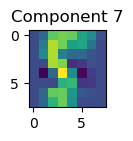

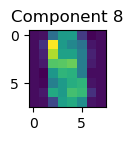

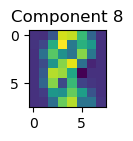

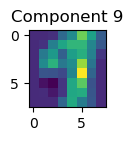

In [22]:
# Your code here.
gmm = GaussianMixture(n_components=10).fit(Xs)
plt.plot(np.log(sorted(list(map(np.linalg.det, gmm.covariances_)))))
(samples, components) = gmm.sample(10)

for (s,c) in zip(samples, components):
    plt.figure(figsize=(1,1))
    plt.imshow(s.reshape((8,8)))
    plt.title(f'Component {c}')
    plt.show()

**Analysis:** We can see in the first plot that the values for each component are different and therefore some digits will be better reconstructed than others. A good way to determine which cluster is better captures is to see a high average silhouette width. You can also calculate the total within-cluster sum of square (wss) and see which cluster is preferable.

## 3. Principal Component Analysis
In this set of exercises we will see how Principal Component Analysis (PCA) can be used to *simplify* the representation of input data in order to make visualize them or to make learning more stable. 

### Exercise 3.1: Fitting a Bayesian Generative Model

Fit a *Quadratic* generative model (e.g. `sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis()`) to the Digits dataset. Observe *all* warnings that the model fitting procedure returns. How well does the trained model work?

**Note**: Since we are using a *supervised* model as a downstream task, you should *split* the dataset into training and test sets. 

In [23]:
(Xs_train, Xs_test, ys_train, ys_test)= train_test_split(Xs, ys, train_size=0.2)

In [24]:
np.linalg.matrix_rank(np.cov(Xs[ys==1].T))#64

51

In [25]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda=QuadraticDiscriminantAnalysis()
qda.fit(Xs_train, ys_train)
print(classification_report(ys_test, qda.predict(Xs_test)))

from sklearn.metrics import mean_absolute_error 
print("RMSE test split:", np.sqrt((((qda.predict(Xs_test)-ys_test)**2.0)).mean()))
#MAS
print("MAS test split:", mean_absolute_error(qda.predict(Xs_test),ys_test))

              precision    recall  f1-score   support

           0       0.26      0.13      0.17       139
           1       0.21      0.39      0.27       137
           2       0.23      0.23      0.23       146
           3       0.25      0.11      0.15       148
           4       0.20      0.32      0.24       152
           5       0.14      0.08      0.10       142
           6       0.38      0.28      0.32       146
           7       0.36      0.34      0.35       146
           8       0.15      0.16      0.16       141
           9       0.17      0.21      0.18       141

    accuracy                           0.23      1438
   macro avg       0.23      0.23      0.22      1438
weighted avg       0.24      0.23      0.22      1438

RMSE test split: 3.765741185469177
MAS test split: 2.8609179415855355


C:\Users\lucia\anaconda3\envs\FML\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


**Analysis:** As we can easily see in the classification report, this classifier has a really low accuracy and doesn't work really well. The variables are collinear, something that happened in the previous laboratory because our original data is not full rank.


## Exercise 3.2: Removing "redundant" dimensions

Use *Principal Component Analysis (PCA)* to reduce the dimensionality of the digits dataset. You can use `sklearn.decomposition.PCA` for this. You should think carefully about how to choose the *number* of principal components to use. You should also think *very carefully* about which data is used to estimate the principal components. Use the transformed dataset to train and test a Bayes Quadratic classifier.

In [87]:
from sklearn.decomposition import PCA
pca = PCA(n_components =0.85,svd_solver='full')
pca.fit(Xs_train)
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda=QuadraticDiscriminantAnalysis()
qda.fit(pca.transform(Xs_train), ys_train)

print(classification_report(ys_test, qda.predict(pca.transform(Xs_test))))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       101
           1       0.97      0.95      0.96        91
           2       1.00      0.99      0.99        79
           3       0.98      0.99      0.98        92
           4       0.97      0.97      0.97        91
           5       1.00      0.97      0.98        88
           6       1.00      0.99      0.99        93
           7       0.94      0.99      0.96        77
           8       0.89      0.95      0.91        91
           9       0.98      0.96      0.97        96

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899



**Analysis:** Using PCA with n_components between 0-1 and svd_solver='full' the number of components is estimated from input data. This new quadratic classifier has an accuracy of 0.97 and is way better than the one we trained before.

### Exercise 3.3: PCA as a visualization tool

Transform the Digits dataset onto only *two* dimensions and visualize the dataset using a scatterplot. You can use `ys` to *color* the points in the scatterplot according to the true classes. Do the classes form natural clusters? Do some of them?

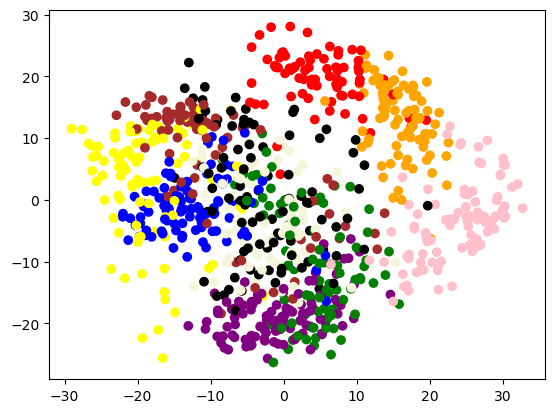

In [77]:
from sklearn.decomposition import PCA
pca = PCA(n_components =2)
pca.fit(Xs_train)
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda=QuadraticDiscriminantAnalysis()
qda.fit(pca.transform(Xs_train), ys_train)
Xs_cambiada=pca.transform(Xs_train)
ys_colors=np.array(["red","green","blue","yellow","pink","black","orange","purple","beige","brown","gray","cyan","magenta"])
plt.scatter([Xs_cambiada[i][0] for i in range(len(Xs_cambiada))],[Xs_cambiada[i][1] for i in range(len(Xs_cambiada))],
            c=ys_colors[ys_train])

plt.show()


**Analysis:** We can easily see in the plot that the classes are mixed and the classes don't form visible clusters. Some of them look like a cluster more than others, the classes that stay in the exterior of the plot, because there is less mixture with other classes.

### Exercise 3.4: TSNE for *better* visualization
PCA is severely limited by the fact that it finds a *linear* manifold of the original data. Use `sklearn.manifold.TSNE` instead to learn a 2-dimensional *nonlinear* manifold of digits. Repeat the visualization like before.

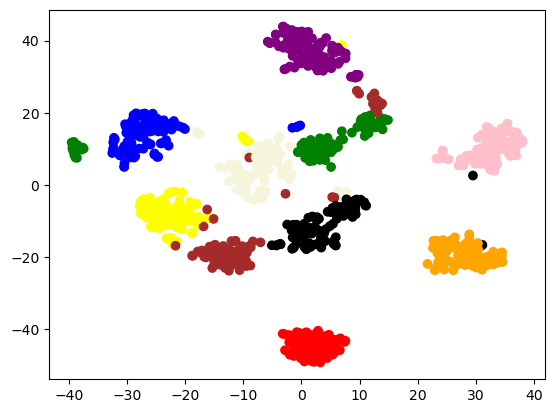

In [84]:
from sklearn.manifold import TSNE
Xs_embedded = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(Xs_train)
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda2=QuadraticDiscriminantAnalysis()
qda2.fit(Xs_embedded, ys_train)
Xs_cambiada=Xs_embedded
ys_colors=np.array(["red","green","blue","yellow","pink","black","orange","purple","beige","brown","gray","cyan","magenta"])
plt.scatter([Xs_cambiada[i][0] for i in range(len(Xs_cambiada))],[Xs_cambiada[i][1] for i in range(len(Xs_cambiada))],
            c=ys_colors[ys_train])

plt.show()

**Analysis:** In this case, we can see that the data creates clusters easily but some classes are still mixed with each others.